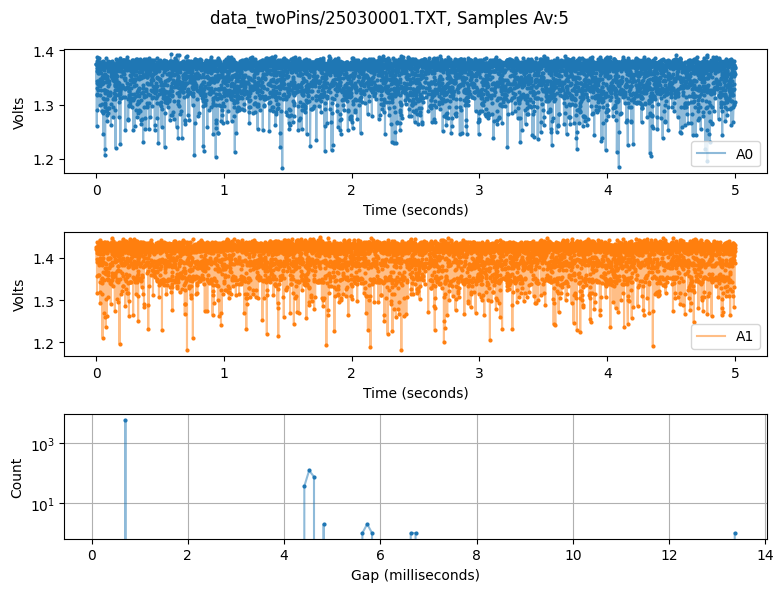

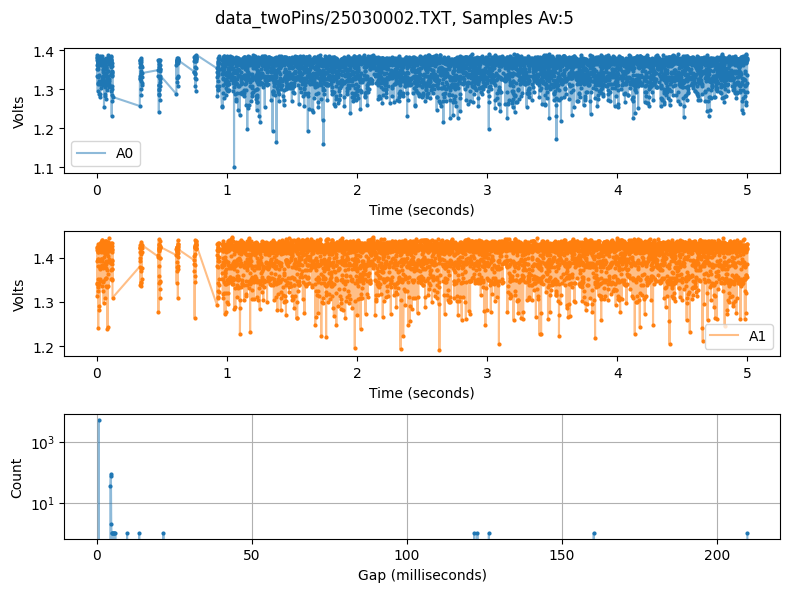

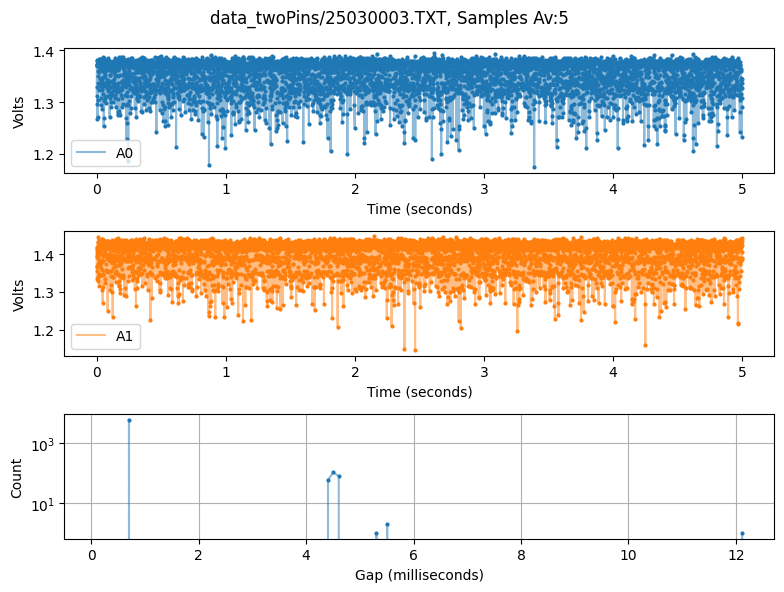

,0,1,2
Filename,25030001.TXT,25030002.TXT,25030003.TXT
Samples_Averaged,5,5,5
Inter_Sample_delay,1.0,9.0,6.0
Inter_Average_delay,2.0,3.0,8.0
Sample_Frequency_KHz,1.56,1.56,1.56
Median_Gap_us,639.0,639.0,639.0
Large_Gap_Analysis_ms,10.0,10.0,10.0
Count_of_Long_Gaps,1,7,1
Largest_Gaps_ms,13.36,209.74,12.12
Small_Gap_Analysis_ms,5.0,5.0,5.0


In [1]:
import os
import pandas as pd
from analysis_plotter_2Pins import analyze_2pins, quickLook

directory_path = 'data_twoPins/'

# Initialize an empty list to store dictionaries for each file
all_dictionaries = []

for filename in os.listdir(directory_path):
    root, extension = os.path.splitext(filename)
    if extension.lower() == ".txt":
        file_path = os.path.join(directory_path, filename)

        # Apply analyze function and get the resulting dictionary
        result_dict = analyze_2pins(file_path, gap_sizeL_us=10_000, gap_sizeS_us=5_000)
        quickLook(file_path)

        # Add a key-value pair for the filename in the dictionary
        result_dict['Filename'] = filename
        result_dict = {'Filename': filename, **result_dict}

        # Append the modified dictionary to the list
        all_dictionaries.append(result_dict)

# Create a DataFrame directly from the list of dictionaries
df = pd.DataFrame(all_dictionaries)
df = df.transpose()
df


In [18]:
import numpy as np
with open('data_M02M4/M4/27030001.TXT', 'r') as file:
        header_lines = 0
        for line in file:
            header_lines += 1
            # Check if the line contains two columns of numbers separated by a comma
            try:
                float_values = [float(val) for val in line.strip().split(',')]
                if len(float_values) == 3:
                    # It's a data line; break from the loop
                    break
            except ValueError:
                # Not a line with two columns of numbers; continue reading headers
                pass

            # Check if the line contains parameters
            if ':' in line:
                param_name, param_value = map(str.strip, line.split(':'))
                if param_name.lower() == 'samples averaged':
                    samples_to_av = int(param_value)
                # Uncomment and modify the following lines if other parameters are present
                elif param_name.lower() == 'inter-sample gap (us)':
                    inter_sample_delay = float(param_value)
                elif param_name.lower() == 'inter-average gap (us)':
                    inter_average_delay = float(param_value)

t, d0, d1 = np.genfromtxt('data_M02M4/M4/27030001.TXT', skip_header=header_lines, unpack=True, delimiter=',')

dt = t - np.roll(t,1)
dt = dt[1:]

gap_index_L = np.where(dt > 7_500)
gap_index_L=gap_index_L[0]
print('Median gap (us): ', np.median(dt))
print('Count of long gaps: ',len(dt[gap_index_L]))
print('Largest gaps (ms): ',max(dt[gap_index_L])/1e3)

Median gap (us):  482.0
Count of long gaps:  35
Largest gaps (ms):  55.196
